In [12]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pygris import tracts


Charts for Health Index (Children in Poverty) in Austin & Detroit   

In [13]:
def get_tracts(state: str) -> gpd.GeoDataFrame:
    """
    Download census tracts for a given state using pygris.
    
    Args:
        state: Two-digit FIPS code for the state (e.g. '48' for Texas)
        
    Returns:
        GeoDataFrame containing census tract geometries and metadata
    """
    print(f"Downloading census tracts for state {state}...")
    tracts_gdf = tracts(state=state, year=2020)
    
    # Ensure GEOID is properly formatted as string
    tracts_gdf['GEOID'] = tracts_gdf['GEOID'].astype(str)
    
    return tracts_gdf


# Download tract geometries
tx_tracts = get_tracts('48')  # Texas
mi_tracts = get_tracts('26')  # Michigan


# Filter to specific counties
wayne_tracts = mi_tracts[mi_tracts['COUNTYFP']=='163']  # Wayne County, MI
travis_tracts = tx_tracts[tx_tracts['COUNTYFP']=='453'] # Travis County, TX

In [14]:
def get_children_in_poverty(csv_file: str) -> pd.DataFrame:
    """
    Read a CSV file containing children in poverty data.
    
    Args:
        csv_file: Path to the CSV file containing children in poverty data
        
    Returns:
        DataFrame containing children in poverty data
    """
    # TODO: Filter rows where 'metric_name' is  only 'Children in Poverty'

    df =  pd.read_csv(csv_file)
    df = df[df['metric_name'] == 'Children in Poverty']
    return df

df_detroit = get_children_in_poverty('data/health/michigan_health/MI_Tract_City_12-03-2024.csv')
df_austin = get_children_in_poverty('data/health/texas_health/TX_Tract_City_12-03-2024.csv')
print("--- DETROIT ---  ")
print(df_detroit.head())
print("--- AUSTIN ---  ")
print(df_austin.head())

--- DETROIT ---  
          geo_fips geo_level  parent_fips parent_level          metric_name  \
30238  26005030901     tract      2674980         city  Children in Poverty   
30239  26017280300     tract      2606020         city  Children in Poverty   
30240  26017280400     tract      2606020         city  Children in Poverty   
30241  26017280500     tract      2606020         city  Children in Poverty   
30242  26017280600     tract      2606020         city  Children in Poverty   

      group_name  data_period  census_parent_shape_year    num  denom   est  \
30238      Total         2022                      2020   40.0  463.0   8.6   
30239      Total         2022                      2020   43.0  212.0  20.3   
30240      Total         2022                      2020  120.0  356.0  33.7   
30241      Total         2022                      2020   35.0  776.0   4.5   
30242      Total         2022                      2020  264.0  670.0  39.4   

        lci   uci  geo_name  par

/var/folders/lm/t9ch096d3jxgjb9t_zwvcd540000gn/T/ipykernel_1230/258743938.py:13: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(csv_file)
/var/folders/lm/t9ch096d3jxgjb9t_zwvcd540000gn/T/ipykernel_1230/258743938.py:13: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(csv_file)


In [15]:
def merge_tracts_and_data(geo: gpd.GeoDataFrame, health_df: pd.DataFrame) -> gpd.GeoDataFrame:
    """
    Merge census tracts with children in poverty data.
    
    Args:
        tracts_gdf: GeoDataFrame containing census tract geometries
        data_df: DataFrame containing children in poverty data
        
    Returns:
        GeoDataFrame with merged data
    """
    health_df['geo_fips'] = health_df['geo_fips'].astype(str)
    geo['GEOID'] = geo['GEOID'].astype(str)
    return geo.merge(health_df, left_on='GEOID', right_on='geo_fips', how='left')

print("--- DETROIT ---  ")
merged_detroit = merge_tracts_and_data(wayne_tracts, df_detroit)
print(merged_detroit.head())
print("--- AUSTIN ---  ")
merged_austin = merge_tracts_and_data(travis_tracts, df_austin)
print(merged_austin.head())

--- DETROIT ---  
  STATEFP COUNTYFP TRACTCE        GEOID  NAME           NAMELSAD  MTFCC  \
0      26      163  591900  26163591900  5919  Census Tract 5919  G5020   
1      26      163  592000  26163592000  5920  Census Tract 5920  G5020   
2      26      163  593200  26163593200  5932  Census Tract 5932  G5020   
3      26      163  594000  26163594000  5940  Census Tract 5940  G5020   
4      26      163  594100  26163594100  5941  Census Tract 5941  G5020   

  FUNCSTAT     ALAND   AWATER  ... est lci uci geo_name parent_name  \
0        S   5033701        0  ... NaN NaN NaN      NaN         NaN   
1        S  12758140  4008857  ... NaN NaN NaN      NaN         NaN   
2        S   2056711        0  ... NaN NaN NaN      NaN         NaN   
3        S   5032161   169441  ... NaN NaN NaN      NaN         NaN   
4        S   2479041        0  ... NaN NaN NaN      NaN         NaN   

   state_fips state_abbr period_type source_name  suggested_citation  
0         NaN        NaN         

/Users/neerajsharma/src/personal/nikki/tsa/.venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/neerajsharma/src/personal/nikki/tsa/.venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [18]:
print(merged_detroit['est'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
623    26.9
624     8.0
625    12.7
626     0.0
627    14.6
Name: est, Length: 628, dtype: float64


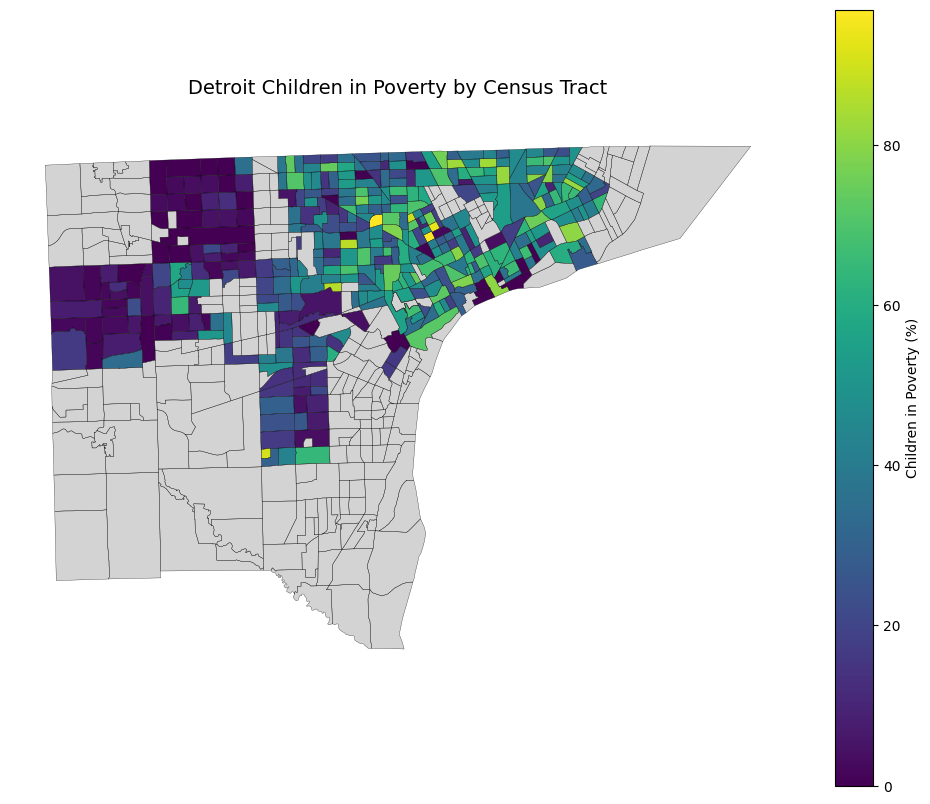

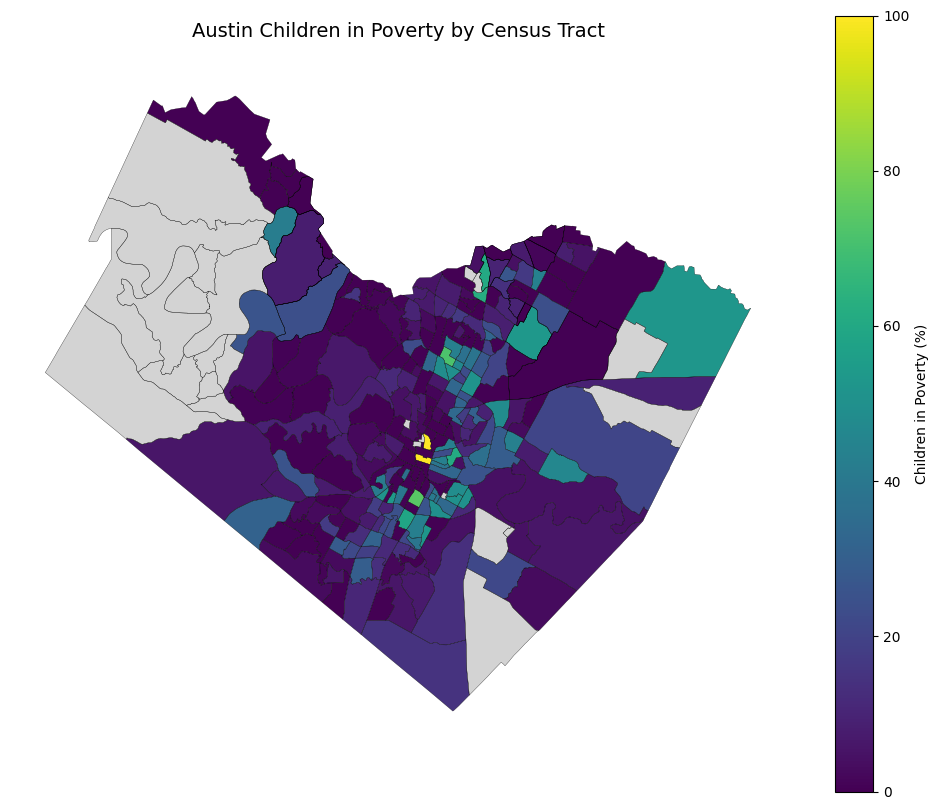

In [22]:
def create_chart(merged_df: gpd.GeoDataFrame, title: str) -> None:
    """
    Create a choropleth map showing children in poverty percentages by census tract.
    
    Args:
        merged_df: GeoDataFrame containing tract geometries and poverty data
    """
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Create the choropleth map
    # Handle NaN values by creating a mask
    mask = merged_df['est'].notna()
    
    # Plot tracts with data
    merged_df[mask].plot(
        column='est',
        cmap='viridis',  # Modern, perceptually uniform colormap
        legend=True,
        legend_kwds={
            'label': 'Children in Poverty (%)',
            'orientation': 'vertical',
            'shrink': 0.8
        },
        ax=ax
    )
    
    # Plot tracts with missing data in grey
    merged_df[~mask].plot(
        color='lightgrey',
        ax=ax
    )
    
    # Customize the map
    ax.set_title(f'{title} Children in Poverty by Census Tract', fontsize=14, pad=20)
    ax.set_axis_off()
    # Add borders to tracts
    merged_df.boundary.plot(color='black', linewidth=0.2, ax=ax)
    
    plt.tight_layout()
    plt.show()
    plt.savefig(f'{title}_children_in_poverty.png')
    plt.close()

create_chart(merged_detroit, 'Detroit')
create_chart(merged_austin, 'Austin')
#create_chart(merged_austin)
